# 数据读取

In [56]:
import pandas as pd
import os

user_level = pd.read_excel('./data/user_level.xlsx', converters={'uid': str})

excel_list = []
for excel in os.listdir('./data'):
    if 'xlsx' in excel and 'user_level' not in excel:
        excel_list.append(excel)

danmu = pd.DataFrame()
for excel in excel_list:
    df = pd.read_excel('./data/' + excel, converters={'id': str, 'uid': str})
    df['video_title'] = excel[:-5]
    danmu = pd.concat([danmu, df], axis=0)
danmu

,id,progress,content,ctime,uid,video_title
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析
...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python


# 时间处理分析

In [57]:
from datetime import datetime

danmu['ctime'] = danmu['ctime'].apply(lambda x: datetime.fromtimestamp(x))
danmu['ctime_year'] = danmu['ctime'].apply(lambda x: x.year)
danmu['ctime_month'] = danmu['ctime'].apply(lambda x: x.month)
danmu['ctime_week'] = danmu['ctime'].apply(datetime.isoweekday)
danmu['ctime_hour'] = danmu['ctime'].apply(lambda x: x.hour)
danmu

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,2021-08-22 22:43:22,4658843910516903647,1、系统认识数据分析,2021,8,7,22
1,53783364377004544,9193,DNA动了,2021-08-23 07:27:06,-5089316151886879487,1、系统认识数据分析,2021,8,1,7
2,53783376819848704,23017,大制作啊,2021-08-23 07:27:30,-5089316151886879487,1、系统认识数据分析,2021,8,1,7
3,53788075865425920,31033,好家伙 我直接好家伙,2021-08-23 09:56:52,-6460990597571269883,1、系统认识数据分析,2021,8,1,9
4,53811230195500032,68093,大制作,2021-08-23 22:12:56,8879111121911466217,1、系统认识数据分析,2021,8,1,22
...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,2022-12-22 00:46:10,-4078686192199890078,5、Python,2022,12,4,0
1250,1212573101313764864,4412898,5,2022-12-22 00:46:17,-4078686192199890078,5、Python,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,2022-12-24 19:19:54,6689174160540423840,5、Python,2022,12,6,19
1252,1214583220188773888,4414000,5,2022-12-24 19:20:02,6689174160540423840,5、Python,2022,12,6,19


In [58]:
import matplotlib.pyplot as plt
# 中文乱码
plt.rcParams['font.family'] = ['SimHei']

### 按月份分析

In [59]:
# 取出2022整年的数据
danmu_2022 = danmu[danmu['ctime_year'] == 2022]
danmu_2022

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour
119,955256697446334464,193596,26个人,2022-01-01 00:04:32,8925482694608335642,1、系统认识数据分析,2022,1,6,0
120,955258091952824320,333566,新年快乐,2022-01-01 00:07:18,8925482694608335642,1、系统认识数据分析,2022,1,6,0
121,957326648055242752,318384,语速正好,2022-01-03 20:37:09,3105945468129837519,1、系统认识数据分析,2022,1,1,20
122,958483048722579456,322386,课件PDF在哪,2022-01-05 10:54:43,-349731603797322061,1、系统认识数据分析,2022,1,3,10
123,958581356437020672,315713,楞,2022-01-05 14:10:02,-6327355589687884151,1、系统认识数据分析,2022,1,3,14
...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,2022-12-22 00:46:10,-4078686192199890078,5、Python,2022,12,4,0
1250,1212573101313764864,4412898,5,2022-12-22 00:46:17,-4078686192199890078,5、Python,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,2022-12-24 19:19:54,6689174160540423840,5、Python,2022,12,6,19
1252,1214583220188773888,4414000,5,2022-12-24 19:20:02,6689174160540423840,5、Python,2022,12,6,19


<AxesSubplot:xlabel='ctime_month'>

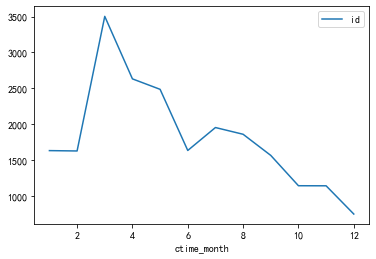

In [60]:
# 每个月的弹幕数量
danmu_2022.groupby('ctime_month')[['id']].count().plot()

#### 22年3月的弹幕非常活跃

<AxesSubplot:xlabel='ctime_month'>

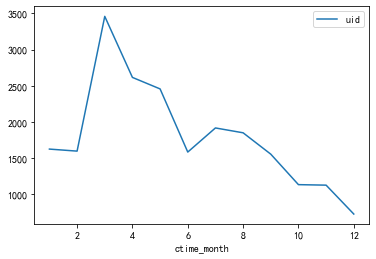

In [61]:
# 每个月发弹幕的人数
danmu_2022.groupby('ctime_month')[['uid']].count().plot()

#### 22年3月发弹幕的人数最多

#### 分析结果

假设一：季节？春招？

假设一需要其它年份数据对比

假设二：视频进入推荐系统，进入推流池？

假设二需要视频每天甚至每分钟播放量等数据验证

假设二可能性较大

### 按星期分析

<AxesSubplot:xlabel='ctime_week'>

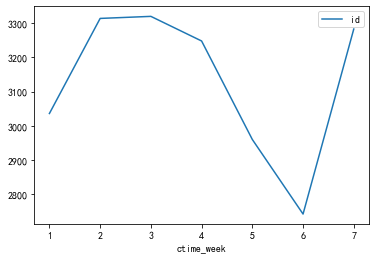

In [62]:
# 周弹幕数量分布
danmu_2022.groupby('ctime_week')[['id']].count().plot()

<AxesSubplot:xlabel='ctime_week'>

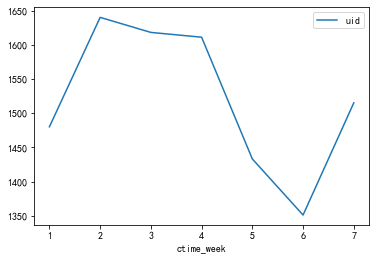

In [63]:
# 周发弹幕的人数分布
danmu_2022.groupby('ctime_week')[['uid']].nunique().plot()

#### 工作日1-4弹幕最活跃，周五周六学习松懈，周日补救学习

In [64]:
# import pygwalker as pyg
# pyg.walk(danmu_2022)

####  每天10-24点观看人数都多

# 用户画像

In [65]:
danmu

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,2021-08-22 22:43:22,4658843910516903647,1、系统认识数据分析,2021,8,7,22
1,53783364377004544,9193,DNA动了,2021-08-23 07:27:06,-5089316151886879487,1、系统认识数据分析,2021,8,1,7
2,53783376819848704,23017,大制作啊,2021-08-23 07:27:30,-5089316151886879487,1、系统认识数据分析,2021,8,1,7
3,53788075865425920,31033,好家伙 我直接好家伙,2021-08-23 09:56:52,-6460990597571269883,1、系统认识数据分析,2021,8,1,9
4,53811230195500032,68093,大制作,2021-08-23 22:12:56,8879111121911466217,1、系统认识数据分析,2021,8,1,22
...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,2022-12-22 00:46:10,-4078686192199890078,5、Python,2022,12,4,0
1250,1212573101313764864,4412898,5,2022-12-22 00:46:17,-4078686192199890078,5、Python,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,2022-12-24 19:19:54,6689174160540423840,5、Python,2022,12,6,19
1252,1214583220188773888,4414000,5,2022-12-24 19:20:02,6689174160540423840,5、Python,2022,12,6,19


## 用户处理

In [66]:
danmu['用户弹幕数'] = danmu.groupby('uid')[['id']].transform('count')
danmu

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,2021-08-22 22:43:22,4658843910516903647,1、系统认识数据分析,2021,8,7,22,2.0
1,53783364377004544,9193,DNA动了,2021-08-23 07:27:06,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0
2,53783376819848704,23017,大制作啊,2021-08-23 07:27:30,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0
3,53788075865425920,31033,好家伙 我直接好家伙,2021-08-23 09:56:52,-6460990597571269883,1、系统认识数据分析,2021,8,1,9,7.0
4,53811230195500032,68093,大制作,2021-08-23 22:12:56,8879111121911466217,1、系统认识数据分析,2021,8,1,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,2022-12-22 00:46:10,-4078686192199890078,5、Python,2022,12,4,0,35.0
1250,1212573101313764864,4412898,5,2022-12-22 00:46:17,-4078686192199890078,5、Python,2022,12,4,0,35.0
1251,1214583153063240704,4407770,疯狂撒花！,2022-12-24 19:19:54,6689174160540423840,5、Python,2022,12,6,19,2.0
1252,1214583220188773888,4414000,5,2022-12-24 19:20:02,6689174160540423840,5、Python,2022,12,6,19,2.0


In [67]:
danmu_user = pd.merge(danmu, user_level, how='inner', on='uid')
danmu_user

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数,level
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,2021-08-22 22:43:22,4658843910516903647,1、系统认识数据分析,2021,8,7,22,2.0,5
1,54982927380083200,4137203,2,2021-09-18 19:00:11,4658843910516903647,2、EXCEL基础操作,2021,9,6,19,2.0,5
2,53783364377004544,9193,DNA动了,2021-08-23 07:27:06,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0,0
3,53783376819848704,23017,大制作啊,2021-08-23 07:27:30,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0,0
4,53850829626031616,1931,打卡,2021-08-24 19:11:46,-5089316151886879487,1、系统认识数据分析,2021,8,2,19,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27610,1192131213687832320,4408637,终于毕业辣！,2022-11-23 19:51:55,-2335781148162268958,5、Python,2022,11,3,19,1.0,0
27611,1193489428359011584,4393601,完结，感谢师兄！,2022-11-25 16:50:26,2218640609761978448,5、Python,2022,11,5,16,2.0,5
27612,1193489958695060736,4433441,废了废了,2022-11-25 16:51:30,2218640609761978448,5、Python,2022,11,5,16,2.0,5
27613,1214583153063240704,4407770,疯狂撒花！,2022-12-24 19:19:54,6689174160540423840,5、Python,2022,12,6,19,2.0,4


## 弹幕内容

In [68]:
danmu_user.groupby('uid')[['id']].count().sort_values(by='id', ascending=False)

,id
uid,
6653485828143602809,214
6812827409839048297,187
-3260951504495839240,176
7975574863793804658,130
-5461449000341941986,102
...,...
-8446399402889408388,1
-8445271993221121197,1
-8444651956084190909,1


In [69]:
# 设置运行结果展现的行数
pd.set_option('display.max_rows', 300)
danmu_user[danmu_user['uid'] == '6653485828143602809']


,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数,level
6874,1117359445828237312,239856,因为原来已经有了一个名称相同的表格了，只不过被师兄隐藏了,2022-08-12 15:53:45,6653485828143602809,2、EXCEL基础操作,2022,8,5,15,214.0,6
6875,1117365973087926528,577767,我有，需要付费,2022-08-12 16:06:43,6653485828143602809,2、EXCEL基础操作,2022,8,5,16,214.0,6
6876,1117367556588805888,702844,商品交易总额,2022-08-12 16:09:52,6653485828143602809,2、EXCEL基础操作,2022,8,5,16,214.0,6
6877,1117368003449593600,753890,平台抽成 总部抽成 工资。。。,2022-08-12 16:10:45,6653485828143602809,2、EXCEL基础操作,2022,8,5,16,214.0,6
6878,1117368718981354752,813715,黑心商家只做外卖,2022-08-12 16:12:11,6653485828143602809,2、EXCEL基础操作,2022,8,5,16,214.0,6
6879,1117368836069266176,827663,小作坊是这样的,2022-08-12 16:12:25,6653485828143602809,2、EXCEL基础操作,2022,8,5,16,214.0,6
6880,1117372758867599616,981734,前面的，没错的,2022-08-12 16:20:12,6653485828143602809,2、EXCEL基础操作,2022,8,5,16,214.0,6
6881,1118055524727096576,1685696,我数据透视表直接复制行吗,2022-08-13 14:56:44,6653485828143602809,2、EXCEL基础操作,2022,8,6,14,214.0,6
6882,1118063929684269568,1958460,wo shu ju tou shi biao bu pei yong you xing ming,2022-08-13 15:13:26,6653485828143602809,2、EXCEL基础操作,2022,8,6,15,214.0,6
6883,1118066264124986368,2044789,基础可是不会能难死一方人,2022-08-13 15:18:05,6653485828143602809,2、EXCEL基础操作,2022,8,6,15,214.0,6


### 弹幕第一：共214条弹幕，不注重第一讲，比较自信，性格外向喜欢回答老师和弹幕的问题

In [70]:
# 设置运行结果展现的行数
pd.set_option('display.max_rows', 300)
danmu_user[danmu_user['uid'] == '6812827409839048297']

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数,level
1485,1094787603103876352,13828,老师好大家好,2022-07-12 12:27:32,6812827409839048297,1、系统认识数据分析,2022,7,2,12,187.0,5
1486,1094916748710439168,718093,基准,2022-07-12 16:44:07,6812827409839048297,1、系统认识数据分析,2022,7,2,16,187.0,5
1487,1094928454727720448,977070,好哲学,2022-07-12 17:07:23,6812827409839048297,1、系统认识数据分析,2022,7,2,17,187.0,5
1488,1094932478877232896,1351164,好难,2022-07-12 17:15:22,6812827409839048297,1、系统认识数据分析,2022,7,2,17,187.0,5
1489,1094934073325065984,1586710,直接目标,2022-07-12 17:18:32,6812827409839048297,1、系统认识数据分析,2022,7,2,17,187.0,5
1490,1094935022923816448,1733095,我也想成为人才,2022-07-12 17:20:26,6812827409839048297,1、系统认识数据分析,2022,7,2,17,187.0,5
1491,1094935196693747200,1758976,谢谢师兄,2022-07-12 17:20:46,6812827409839048297,1、系统认识数据分析,2022,7,2,17,187.0,5
1492,1096344549216902656,501721,裸辞三个月了 虽然以前天天用excel用到烂 但还是认真听下当作复习以及查漏补缺,2022-07-14 16:00:54,6812827409839048297,2、EXCEL基础操作,2022,7,4,16,187.0,5
1493,1096345115917801984,551785,筛选快捷键：ctrl+shift+L,2022-07-14 16:02:02,6812827409839048297,2、EXCEL基础操作,2022,7,4,16,187.0,5
1494,1096345616029831680,608476,要清洗数据,2022-07-14 16:03:01,6812827409839048297,2、EXCEL基础操作,2022,7,4,16,187.0,5


### 弹幕第二：共187条弹幕，有礼貌、学习态度认真，基础比较差但是学的比较刻苦，气氛组

In [71]:
# 设置运行结果展现的行数
pd.set_option('display.max_rows', 300)
danmu_user[danmu_user['uid'] == '-3260951504495839240']

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数,level
6467,1041225824386199808,183150,我来二刷；,2022-04-29 14:49:50,-3260951504495839240,2、EXCEL基础操作,2022,4,5,14,176.0,0
6468,1047724718272178944,1228061,数据透视比表内部的筛选类似是安装依托在空调显示屏的按键，而切片器类似于无线的遥控器，可以跨工...,2022-05-08 14:01:59,-3260951504495839240,2、EXCEL基础操作,2022,5,7,14,176.0,0
6469,1047726854649177344,1298195,WPS个人版没有“宏”功能，企业版才有，我现在改用office365了。,2022-05-08 14:06:13,-3260951504495839240,2、EXCEL基础操作,2022,5,7,14,176.0,0
6470,1047730589240738560,1362668,这个和tableau的逻辑是相通的,2022-05-08 14:13:39,-3260951504495839240,2、EXCEL基础操作,2022,5,7,14,176.0,0
6471,1040398014067393280,1601015,好细了,2022-04-28 11:25:08,-3260951504495839240,2、EXCEL基础操作,2022,4,4,11,176.0,0
6472,1040535294920801024,1656718,1-8月直接好做，1和8月直接做我还真不会,2022-04-28 15:57:53,-3260951504495839240,2、EXCEL基础操作,2022,4,4,15,176.0,0
6473,1040536250735496704,1768366,毕业论文要跨工作表引用数据，我就这样开了4个窗口，方便很多，还不会混乱，很好用的功能,2022-04-28 15:59:47,-3260951504495839240,2、EXCEL基础操作,2022,4,4,15,176.0,0
6474,1040547048929113344,2123449,筛选是隐藏了2-7月的数据，要是直接都选中那么结果还是1-8月，需要先筛选，然后逗号分开加总到一起,2022-04-28 16:21:14,-3260951504495839240,2、EXCEL基础操作,2022,4,4,16,176.0,0
6475,1047754076378442752,2104820,个人方法：先单独筛选出“一月”，sum求和，然后再单独筛选“八月”，使用逗号间隔将八月的数据...,2022-05-08 15:00:19,-3260951504495839240,2、EXCEL基础操作,2022,5,7,15,176.0,0
6476,1047754871610218240,2121600,sum函数进行数据分段相加（使用逗号分隔），别使用隐藏（没用，还是会计算进去），更不要删改数...,2022-05-08 15:01:53,-3260951504495839240,2、EXCEL基础操作,2022,5,7,15,176.0,0


### 弹幕第三：共176条弹幕，二刷大佬，实操能手，会很多的实操小技巧

## 弹幕用户等级

<AxesSubplot:xlabel='level'>

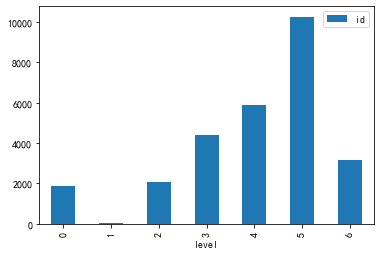

In [72]:
# 等级与弹幕数关系
danmu_user.groupby('level')[['id']].count().plot(kind='bar')

<AxesSubplot:xlabel='level'>

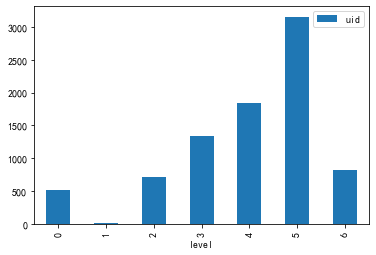

In [73]:
# 等级与发弹幕人数关系
danmu_user.groupby('level')[['uid']].nunique().plot(kind='bar')

### 4-5级用户发的弹幕最多最活跃，大部分弹幕来源于4-5级用户，都为b站的粘性用户

## 视频内容

In [74]:
danmu

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,2021-08-22 22:43:22,4658843910516903647,1、系统认识数据分析,2021,8,7,22,2.0
1,53783364377004544,9193,DNA动了,2021-08-23 07:27:06,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0
2,53783376819848704,23017,大制作啊,2021-08-23 07:27:30,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0
3,53788075865425920,31033,好家伙 我直接好家伙,2021-08-23 09:56:52,-6460990597571269883,1、系统认识数据分析,2021,8,1,9,7.0
4,53811230195500032,68093,大制作,2021-08-23 22:12:56,8879111121911466217,1、系统认识数据分析,2021,8,1,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,2022-12-22 00:46:10,-4078686192199890078,5、Python,2022,12,4,0,35.0
1250,1212573101313764864,4412898,5,2022-12-22 00:46:17,-4078686192199890078,5、Python,2022,12,4,0,35.0
1251,1214583153063240704,4407770,疯狂撒花！,2022-12-24 19:19:54,6689174160540423840,5、Python,2022,12,6,19,2.0
1252,1214583220188773888,4414000,5,2022-12-24 19:20:02,6689174160540423840,5、Python,2022,12,6,19,2.0


### 视频内容处理

In [75]:
from time import strftime
from time import gmtime

danmu['progress'] = danmu['progress']/1000
danmu['视频进度'] = danmu['progress'].apply(lambda x: strftime('%H:%M:%S', gmtime(x)))

In [76]:
danmu['视频进度【时分】'] = danmu['视频进度'].str[:5]
danmu

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数,视频进度,视频进度【时分】
0,53766889040208384,2.691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,2021-08-22 22:43:22,4658843910516903647,1、系统认识数据分析,2021,8,7,22,2.0,00:00:02,00:00
1,53783364377004544,9.193,DNA动了,2021-08-23 07:27:06,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0,00:00:09,00:00
2,53783376819848704,23.017,大制作啊,2021-08-23 07:27:30,-5089316151886879487,1、系统认识数据分析,2021,8,1,7,79.0,00:00:23,00:00
3,53788075865425920,31.033,好家伙 我直接好家伙,2021-08-23 09:56:52,-6460990597571269883,1、系统认识数据分析,2021,8,1,9,7.0,00:00:31,00:00
4,53811230195500032,68.093,大制作,2021-08-23 22:12:56,8879111121911466217,1、系统认识数据分析,2021,8,1,22,2.0,00:01:08,00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404.199,终于毕业辣！,2022-12-22 00:46:10,-4078686192199890078,5、Python,2022,12,4,0,35.0,01:13:24,01:13
1250,1212573101313764864,4412.898,5,2022-12-22 00:46:17,-4078686192199890078,5、Python,2022,12,4,0,35.0,01:13:32,01:13
1251,1214583153063240704,4407.770,疯狂撒花！,2022-12-24 19:19:54,6689174160540423840,5、Python,2022,12,6,19,2.0,01:13:27,01:13
1252,1214583220188773888,4414.000,5,2022-12-24 19:20:02,6689174160540423840,5、Python,2022,12,6,19,2.0,01:13:34,01:13


### 视频内容分析

#### 视频1、系统认识数据分析

In [81]:
video_1 = danmu[danmu['video_title'] == '1、系统认识数据分析']
video_1.groupby('视频进度【时分】')[['id']].count().sort_values(by='id', ascending=False)

,id
视频进度【时分】,
00:29,244
00:00,128
00:11,100
00:09,88
00:15,85
00:24,85
00:28,79
00:01,77
00:03,76


In [82]:
danmu[danmu['视频进度【时分】'] == '00:11']

,id,progress,content,ctime,uid,video_title,ctime_year,ctime_month,ctime_week,ctime_hour,用户弹幕数,视频进度,视频进度【时分】
467,54538390004170240,683.024,正在看的小伙伴举个手呀,2021-09-08 23:28:43,4287605311228341710,1、系统认识数据分析,2021,9,3,23,1.0,00:11:23,00:11
468,54614344568386048,695.103,举手,2021-09-10 15:43:15,-1628569071256015389,1、系统认识数据分析,2021,9,5,15,3.0,00:11:35,00:11
469,54655814497023488,702.582,1,2021-09-11 13:41:33,-1367667807228799785,1、系统认识数据分析,2021,9,6,13,1.0,00:11:42,00:11
470,54721008270816256,713.449,1,2021-09-13 00:14:00,-296757868499160289,1、系统认识数据分析,2021,9,1,0,1.0,00:11:53,00:11
480,55127660746605568,705.966,1,2021-09-21 23:41:08,-6542834790891478612,1、系统认识数据分析,2021,9,2,23,1.0,00:11:45,00:11
482,55160558195541504,693.326,举手,2021-09-22 17:06:55,7815453928319057398,1、系统认识数据分析,2021,9,3,17,2.0,00:11:33,00:11
483,55249734176776704,677.565,红红火火恍恍惚惚,2021-09-24 16:21:44,4911477121964877228,1、系统认识数据分析,2021,9,5,16,2.0,00:11:17,00:11
485,55324748334235136,697.368,我我我,2021-09-26 08:06:23,-2332941944077862983,1、系统认识数据分析,2021,9,7,8,6.0,00:11:37,00:11
486,55324751524026880,706.511,嘎嘎嘎,2021-09-26 08:06:29,-2332941944077862983,1、系统认识数据分析,2021,9,7,8,6.0,00:11:46,00:11
487,55375446866020352,708.501,哒啦啦~,2021-09-27 10:58:02,1428966444445166747,1、系统认识数据分析,2021,9,1,10,1.0,00:11:48,00:11


 ##### 开头与结尾正常弹幕，11分时有节奏弹幕发出，许多弹幕给予回应

#### 视频2、Excel

In [83]:
video_2 = danmu[danmu['video_title'] == '2、EXCEL基础操作']
video_2.groupby('视频进度【时分】')[['id']].count().sort_values(by='id', ascending=False)

,id
视频进度【时分】,
03:07,1277
03:06,570
00:58,406
03:20,322
03:21,302
00:00,191
01:09,163
00:39,154
01:08,143


##### 在视频3时06-07分时，弹幕给予对up主excel课程的肯定，满意度非常高